In [41]:
import pandas as pd
data = pd.read_csv('bank_nifty.csv',parse_dates=[['Date','Time']])

In [42]:
data.head()

,Date_Time,Open,High,Low,Close,Volume
0,2012-05-30 09:15:00,9599.9004,9599.9004,9561.7998,9566.0000,21375
1,2012-05-30 09:16:00,9565.0996,9565.0996,9555.1504,9564.4004,15475
2,2012-05-30 09:17:00,9564.3496,9570.0000,9563.6504,9567.0000,13850
3,2012-05-30 09:18:00,9568.0000,9569.0000,9561.6504,9563.2500,11250
4,2012-05-30 09:19:00,9566.5498,9568.0000,9556.0000,9558.3496,16050


In [43]:
data.shape

(412117, 6)

In [44]:
import numpy as np

In [45]:
class strategy:
    def __init__(self):
        self.t_name = t_name
        self.long_win = long_win
        self.short_win = short_win
        self.cond = data.index>self.long_win
        self.trade_price = data['Open']
        self.close = data['Close']
    def smav(self):
        self.smav = np.where(strategy().cond,strategy().close.rolling(window=strategy().short_win).mean(),0)
        return self.smav
    def lmav(self):
        self.lmav = np.where(strategy().cond,strategy().close.rolling(window=strategy().long_win).mean(),0)
        return self.lmav
    
    def trend_day(self):
        self.trend_day = np.where(strategy().smav()>strategy().lmav(),1,np.where(strategy().smav()<strategy().lmav(),-1,0))
        return self.trend_day
    def prev_trend_day(self):
        self.prev_trend_day = np.where(strategy().cond,np.roll(strategy().trend_day(),1),0)
        return self.prev_trend_day
    def diff_trend_day(self):
        self.diff_trend_day = strategy().trend_day() + strategy().prev_trend_day()
        return self.diff_trend_day

In [46]:
# global variable
t_name = 'mav'
long_win = 20
short_win = 10


In [47]:
s = strategy()
data['smav'] = s.smav()
data['lmav'] = s.lmav()
data['trend_day'] = s.trend_day()
data['prev_trend_day'] = s.prev_trend_day()
data['diff_trend_day'] = s.diff_trend_day()

In [48]:
data.loc[20:50,['smav','lmav','trend_day','prev_trend_day','diff_trend_day']]

,smav,lmav,trend_day,prev_trend_day,diff_trend_day
20,0.00000,0.00000,0,0,0
21,9532.06992,9539.81743,-1,0,-1
22,9528.60996,9536.72744,-1,-1,-2
23,9525.57998,9533.94995,-1,-1,-2
24,9523.17002,9531.77998,-1,-1,-2
25,9521.01006,9530.47998,-1,-1,-2
26,9518.79004,9529.12246,-1,-1,-2
27,9516.97002,9528.10747,-1,-1,-2
28,9515.77500,9527.33496,-1,-1,-2
29,9515.92500,9526.48496,-1,-1,-2


In [49]:
class signal:
    def __init__(self):
        pass
    def trade_signal(self):
        self.trade_signal = np.where(strategy().diff_trend_day()==0,strategy().trend_day(),0)
        return self.trade_signal
    def order(self):
        self.order = np.where(strategy().cond,np.roll(signal().trade_signal(),1),0)
        return self.order
ts = signal()

data['trade_signal'] = ts.trade_signal()
data['order'] = ts.order()


In [56]:
data.loc[20:2000,['trend_day','prev_trend_day','diff_trend_day','trade_signal','order']]

,trend_day,prev_trend_day,diff_trend_day,trade_signal,order
20,0,0,0,0,0
21,-1,0,-1,0,0
22,-1,-1,-2,0,0
23,-1,-1,-2,0,0
24,-1,-1,-2,0,0
25,-1,-1,-2,0,0
26,-1,-1,-2,0,0
27,-1,-1,-2,0,0
28,-1,-1,-2,0,0
29,-1,-1,-2,0,0


In [51]:
class portfolio:
    def __init__(self):
        self.lot_size_long = 1
        self.lot_size_short = 1
        self.contract_size = 1
        self.initial_cash = 100000
        self.long_amt = (-1)*np.where(signal().order()==1,self.lot_size_long*self.contract_size*strategy().trade_price,0)
        self.short_amt = (1)*np.where(signal().order()==-1,self.lot_size_short*self.contract_size*strategy().trade_price,0)
    def cash_delta(self):
        self.cash_delta = portfolio().long_amt+ portfolio().short_amt
        return self.cash_delta
    def end_bal(self):
        self.end_bal = portfolio().initial_cash + portfolio().cash_delta().cumsum()
        return self.end_bal
    def end_pos(self):
        self.end_pos = signal().order().cumsum()
        return self.end_pos
p = portfolio()
data['long_amt'] = p.long_amt
data['short_amt'] = p.short_amt  
data['cash_delta'] = p.cash_delta()
data['end_bal'] = p.end_bal()
data['end_pos'] = p.end_pos()

In [52]:
data.loc[20:100,['trend_day','prev_trend_day','diff_trend_day','trade_signal','order','long_amt','short_amt','cash_delta','end_bal','end_pos']]

,trend_day,prev_trend_day,diff_trend_day,trade_signal,order,long_amt,short_amt,cash_delta,end_bal,end_pos
20,0,0,0,0,0,-0.0,0.0,0.0,100000.0,0
21,-1,0,-1,0,0,-0.0,0.0,0.0,100000.0,0
22,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0
23,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0
24,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0
25,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0
26,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0
27,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0
28,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0
29,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0


In [53]:
data['pnl'] = data['end_bal'] + strategy().trade_price * portfolio().end_pos() * portfolio().contract_size
#(portfolio().end_pos * strategy().trade_price * portfolio().contract_size)
data.loc[20:100,['trend_day','prev_trend_day','diff_trend_day','trade_signal','order','long_amt','short_amt','cash_delta','end_bal','end_pos','pnl']]

,trend_day,prev_trend_day,diff_trend_day,trade_signal,order,long_amt,short_amt,cash_delta,end_bal,end_pos,pnl
20,0,0,0,0,0,-0.0,0.0,0.0,100000.0,0,100000.0000
21,-1,0,-1,0,0,-0.0,0.0,0.0,100000.0,0,100000.0000
22,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0,100000.0000
23,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0,100000.0000
24,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0,100000.0000
25,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0,100000.0000
26,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0,100000.0000
27,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0,100000.0000
28,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0,100000.0000
29,-1,-1,-2,0,0,-0.0,0.0,0.0,100000.0,0,100000.0000


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
data1 = data.set_index('Date_Time')

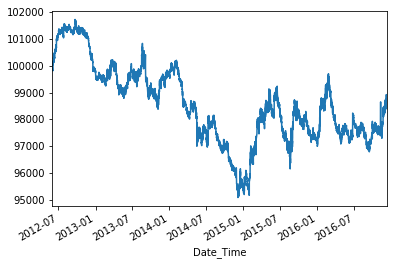

In [55]:
print_pnl = data1['pnl'].plot()
plt.show(print_pnl)